**Tugas 4**

Nama : Siskanti

NIM : H071201064

Prodi : Sistem Informasi

## **Data Integration**

Integrasi data adalah proses menggabungkan atau mengkombinasikan dua atau lebih set data yang berasal dari sumber yang berbeda ke dalam suatu penyimpanan seperti data warehouse. Salah satu manfaat yang didapatkan dengan melakukan integrasi data adalah terhindar dari duplikat data. Seperti kita ketahui, jika terdapat duplikat data maka akan mengganggu proses selanjutnya yang hendak dilakukan seperti analisis data karena nilai yang diperoleh bisa tidak konsisten.

Berikut beberapa keuntungan yang didapatkan ketika dilakukannya integrasi data:

1. Proses analisis akan lebih mudah jika data di integrasikan
2. Untuk menghindari adanya penduplikatan data
3. Untuk Sharing data di lingkungan kerja karena data integrasi banyak digunakan jika bekerja dengan database

 **Masalah dalam Integrasi Data**
1. Integrasi Skema

    Entitas dunia nyata dari berbagai sumber dicocokkan yang mana disebut masalah identifikasi entitas. 

2. Redudansi

    Redudansi terjadi apabila ada beberapa atribut, kita misalkan atribut A dan atribut B itu memiliki perbedaan yang banyak sehingga akan dilakukan seleksi fitur

3. Deteksi dan resolusi konflik nilai data

    Reduksi data biasa dilakukan pada data yang berdimendi tinggi misalnya pada atribut dan variabel yang jumlahnya semakin banyak. 

**Cara Mengatasi Redudansi pada Integrasi Data**

Redudansi data terjadi ketika kita menggabungkan beberapa data dari berbagai sumber database. mengidentifikasi objek itu atribut atau objek yang sama memilih nama berbeda dalam suatau database.  Derivable data itu satu atribut mungkin diperoleh dari atribut lain dalam suatu data. Kemudian redudansi atribut mungkin dapat dideteksi dengan analisa kolerasi dan analisa kovarian. Sehingga kita harus teliti dalam melakukan integrasi data agar dapat mengurangi terjadinya redudansi dan ketidak konsistenan data. 

**Dimensionality Reduction**

Dimensionality reduction adalah proses pengurangan dimensi dari data yang berdimensi besar menjadi data yang berdimensi kecil. Ada dua teknik dalam dimensionality reduction ini, yaitu feature selection dan feature extraction. 

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

### **Preprocessing**

In [4]:
df = pd.read_csv("Iris_modified_dataset.csv")

In [5]:
df.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalAreacm2,PetalAreacm2
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


In [6]:
df.isnull().sum()

Unnamed: 0       0
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
SepalAreacm2     0
PetalAreacm2     0
dtype: int64

In [7]:
df["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:

cleanup_nums = {"Species":     {"Iris-virginica": 1.0, "Iris-setosa": 2.0, "Iris-versicolor":3.0}}
df.replace(cleanup_nums, inplace=True)
df.head()
df.dtypes

Unnamed: 0         int64
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species          float64
SepalAreacm2     float64
PetalAreacm2     float64
dtype: object

In [9]:
X = df.drop("Species",1)   #Feature Matrix
y = df["Species"]          #Target Variable
df.head()
print(X)
column_name = list(X.columns)

     Unnamed: 0   Id  SepalLengthCm  ...  PetalWidthCm  SepalAreacm2  PetalAreacm2
0             0    1            5.1  ...           0.2         17.85          0.28
1             1    2            4.9  ...           0.2         14.70          0.28
2             2    3            4.7  ...           0.2         15.04          0.26
3             3    4            4.6  ...           0.2         14.26          0.30
4             4    5            5.0  ...           0.2         18.00          0.28
..          ...  ...            ...  ...           ...           ...           ...
145         145  146            6.7  ...           2.3         20.10         11.96
146         146  147            6.3  ...           1.9         15.75          9.50
147         147  148            6.5  ...           2.0         19.50         10.40
148         148  149            6.2  ...           2.3         21.08         12.42
149         149  150            5.9  ...           1.8         17.70          9.18

[15

In [10]:
df.describe()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalAreacm2,PetalAreacm2
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,75.500000,5.843333,3.054000,3.758667,1.198667,2.000000,17.806533,5.793133
std,43.445368,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232,3.368693,4.713499
min,0.000000,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000,10.000000,0.110000
25%,37.250000,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000,15.645000,0.420000
50%,74.500000,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000,17.660000,5.615000
75%,111.750000,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000,20.325000,9.690000
max,149.000000,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000,30.020000,15.870000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(X)

In [17]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
df = pd.DataFrame(data=data_scaled, columns= column_name)
df.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalAreacm2,PetalAreacm2
0,0.000000,0.000000,0.222222,0.625000,0.067797,0.041667,0.392108,0.010787
1,0.006711,0.006711,0.166667,0.416667,0.067797,0.041667,0.234765,0.010787
2,0.013423,0.013423,0.111111,0.500000,0.050847,0.041667,0.251748,0.009518
3,0.020134,0.020134,0.083333,0.458333,0.084746,0.041667,0.212787,0.012056
4,0.026846,0.026846,0.194444,0.666667,0.067797,0.041667,0.399600,0.010787


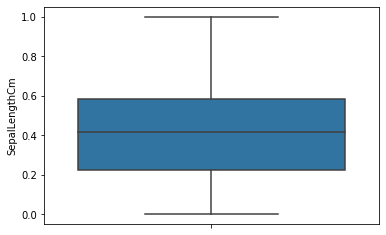

In [19]:
import seaborn as sns
sns.boxplot(y=df['SepalLengthCm'])

In [20]:
df = pd.concat([df, y], axis = 1)
df.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalAreacm2,PetalAreacm2,Species
0,0.000000,0.000000,0.222222,0.625000,0.067797,0.041667,0.392108,0.010787,2.0
1,0.006711,0.006711,0.166667,0.416667,0.067797,0.041667,0.234765,0.010787,2.0
2,0.013423,0.013423,0.111111,0.500000,0.050847,0.041667,0.251748,0.009518,2.0
3,0.020134,0.020134,0.083333,0.458333,0.084746,0.041667,0.212787,0.012056,2.0
4,0.026846,0.026846,0.194444,0.666667,0.067797,0.041667,0.399600,0.010787,2.0


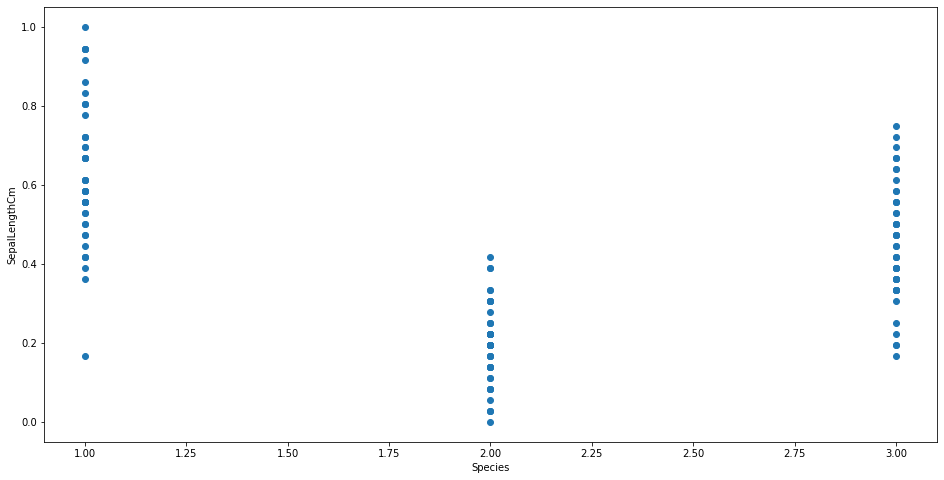

In [21]:

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Species'], df['SepalLengthCm'])
ax.set_xlabel('Species')
ax.set_ylabel('SepalLengthCm')
plt.show()

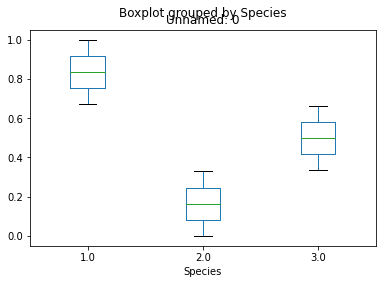

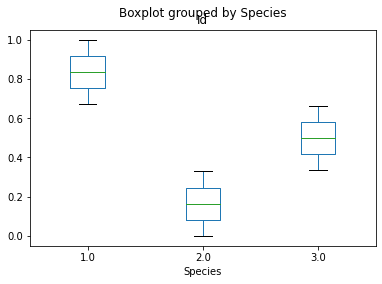

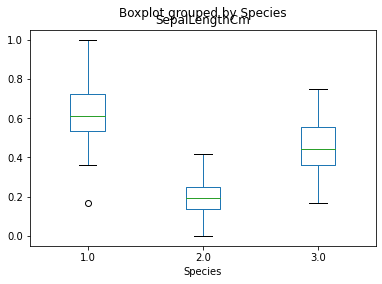

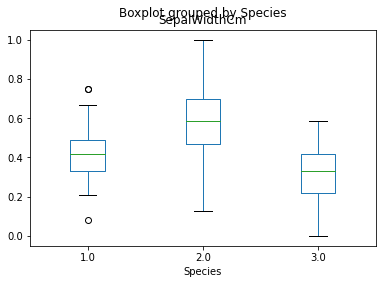

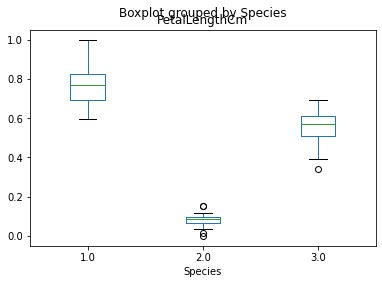

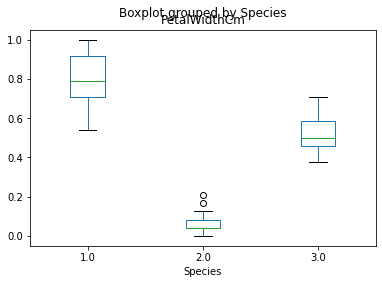

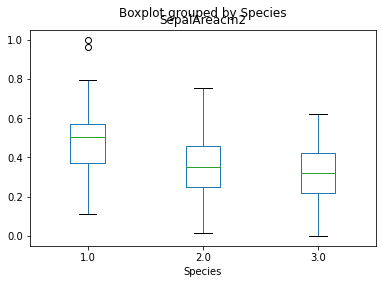

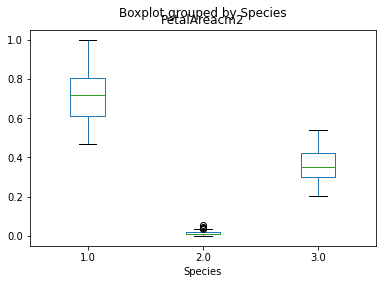

In [23]:

import matplotlib.pyplot as plt  
% matplotlib inline 

x = df.drop("Species",1)
columns_name = list(x.columns)

for i in column_name:
  df.boxplot(by ='Species', column =[i], grid = False)

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0       0.500000
Id               0.500000
SepalLengthCm    0.361111
SepalWidthCm     0.208333
PetalLengthCm    0.593220
PetalWidthCm     0.625000
SepalAreacm2     0.233766
PetalAreacm2     0.588198
Species          2.000000
dtype: float64


In [25]:
print(df.shape)

(150, 9)


In [26]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(144, 9)


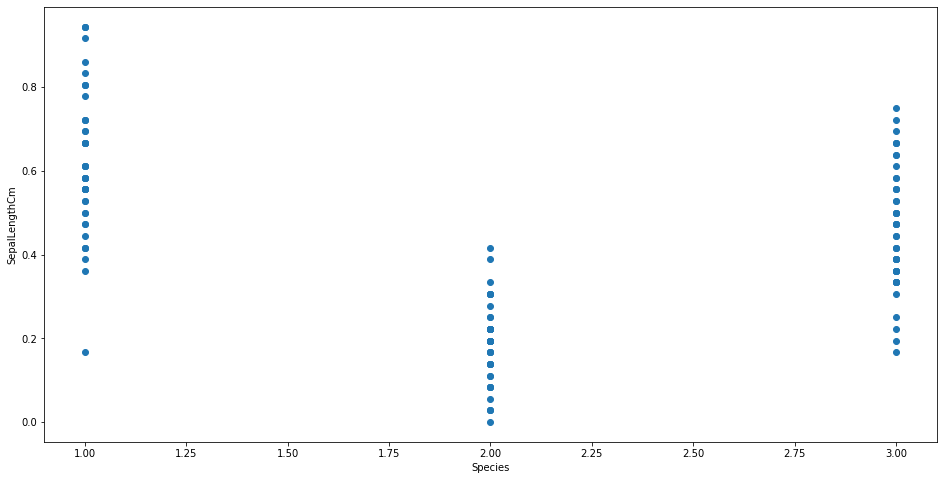

In [27]:

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_out['Species'], df_out['SepalLengthCm'])
ax.set_xlabel('Species')
ax.set_ylabel('SepalLengthCm')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

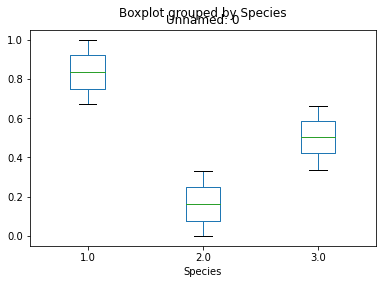

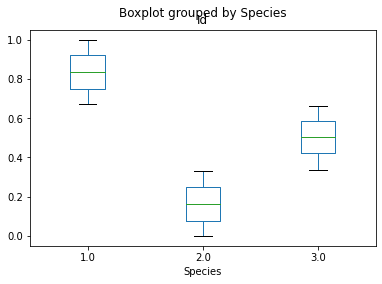

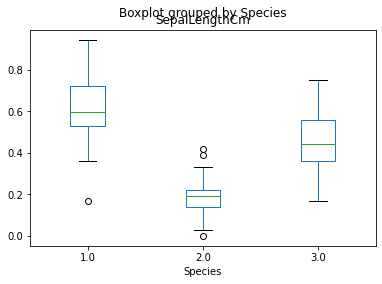

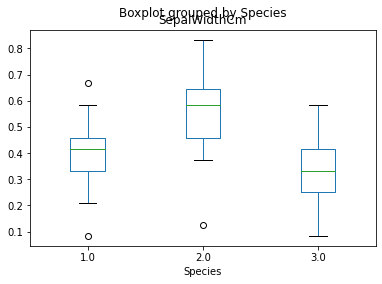

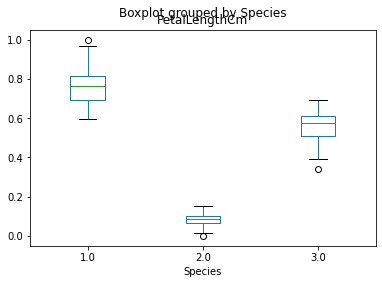

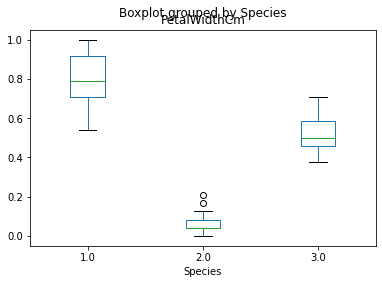

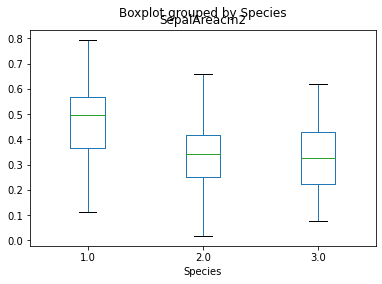

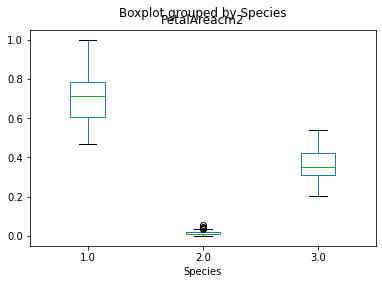

In [28]:
import matplotlib.pyplot as plt  
% matplotlib inline 

X_fix = df_out.drop("Species",1)
y_fix = df_out["Species"]
columns_name = list(X_fix.columns)

for i in column_name:
  df_out.boxplot(by ='Species', column =[i], grid = False)

### **Feature Importance**

Feature selection, memilih feature yang berpengaruh dari sekumpulan data asli. Bagaimana fitur-fitur diberikan sebuah fungsi statistik sehingga dapat dilakukan pengurutan dalam sebuah nilai. Misalnya kita bisa melakukan perangkingan antara fitur tersebut dengan fitur sebuah target. Misalnya dibawah ini saya akan melakukan perankingan pada Spesifikasi bunga iris. Dan dapat dilihat dibawah ini pada proses univariate selection

1. Univariate Selection

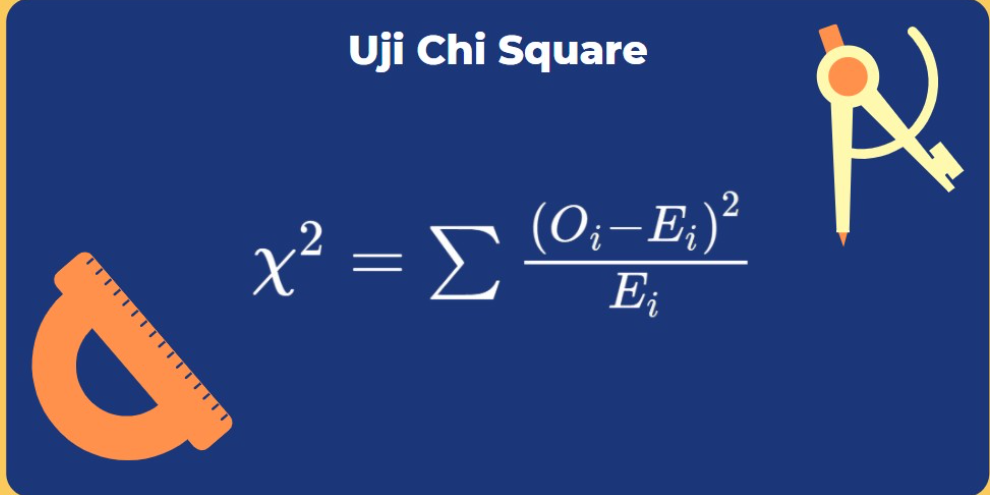

Penggunaan Uji Chi Square (Kai Kuadrat)
Uji Chi Square sangat cocok digunakan untuk menganalisis data seperti kasus diatas. Secara umum, uji Chi square dapat digunakan untuk menguji:

1. Uji Ⅹ² untuk ada tidaknya hubungan antara dua variabel (Independency test).
2. Uji Ⅹ² untuk homogenitas antar- sub kelompok (Homogenity test).
3. Uji Ⅹ² untuk Bentuk Distribusi (Goodness of Fit)

Pada Univariate Selection kita menggunakan metode Chi Square. Chi Square adalah salah satu jenis uji komparatif non parametris yang dilakukan pada dua variabel, di mana skala data kedua variabel adalah nominal. (Apabila dari 2 variabel, ada 1 variabel dengan skala nominal maka dilakukan uji chi square dengan merujuk bahwa harus digunakan uji pada derajat yang terendah). 

Disini kita menggunakan library "sklearn" yang mempunyai kelas "feature selection" dan didalamnya ada metode yang digunakan untuk menghitung dan melihat fitur yang terbaik. Dan ada juga metode yang digunakan untuk menghitung formula chi square.

pada kode di bawah kita buat variabel bestfeatures menggunakan metode SelectKBest kemudian fungsinya kita gunakan chi square. Kemudian kita akan lakukan fitting. kemudian kita buat variabel dfscores yang mana nilai dari perhitungan chi square akan disimpan divariabel dfscores.

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df_out.iloc[:,0:77]  #independent columns
y = df_out.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=2) 

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
p_values = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X_fix.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores, p_values],axis=1)
featureScores.columns = ['Spesific Iris','chi-square Score', 'p-values']  #naming the dataframe columns
print(featureScores.nlargest(77,'chi-square Score'))  #print 10 best features

   Spesific Iris  chi-square Score      p-values
8            NaN         48.328720  3.202962e-11
7   PetalAreacm2         30.992371  1.862482e-07
5   PetalWidthCm         28.684469  5.905364e-07
4  PetalLengthCm         24.962581  3.797033e-06
0     Unnamed: 0         21.343905  2.318621e-05
1             Id         21.343905  2.318621e-05
2  SepalLengthCm         10.716953  4.708074e-03
3   SepalWidthCm          3.499079  1.738540e-01
6   SepalAreacm2          1.350889  5.089303e-01


2. SVM-RFE

Pada bagian ini sebenarnya RFE tidak harus menggunakan SVM. 

Kita deklarasikan fungsi sendiri. Fungsi yang kita buat gunaanya untuk menampung nilai ranking, sekalian dilakukan normalisasi dengan metode min-max scaller.

In [30]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from operator import itemgetter

X = df_out.iloc[:,0:77]
y = df_out.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

colnames = X.columns
n_features_to_select = 1 # dia akan berhenti untuk melakukan training jika fiturnya tinggal 1
svclassifier = SVC(kernel='linear')
rfe = RFE(svclassifier, n_features_to_select, verbose = 1)
rfe.fit(X, y)

y_pred = rfe.predict(X)

ranks[f"RFE score"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [32]:
# Put the mean scores into a Pandas dataframe
df_rank = pd.DataFrame(list(ranks[f"RFE score"].items()), columns= ['Feature','Scores'])

# Sort the dataframe
df_rank = df_rank.sort_values('Scores', ascending=False)

In [56]:
df_rank

,Feature,Scores
8,Species,1.00
4,PetalLengthCm,0.88
5,PetalWidthCm,0.75
0,Unnamed: 0,0.62
7,PetalAreacm2,0.50
1,Id,0.38
3,SepalWidthCm,0.25
2,SepalLengthCm,0.12
6,SepalAreacm2,0.00


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


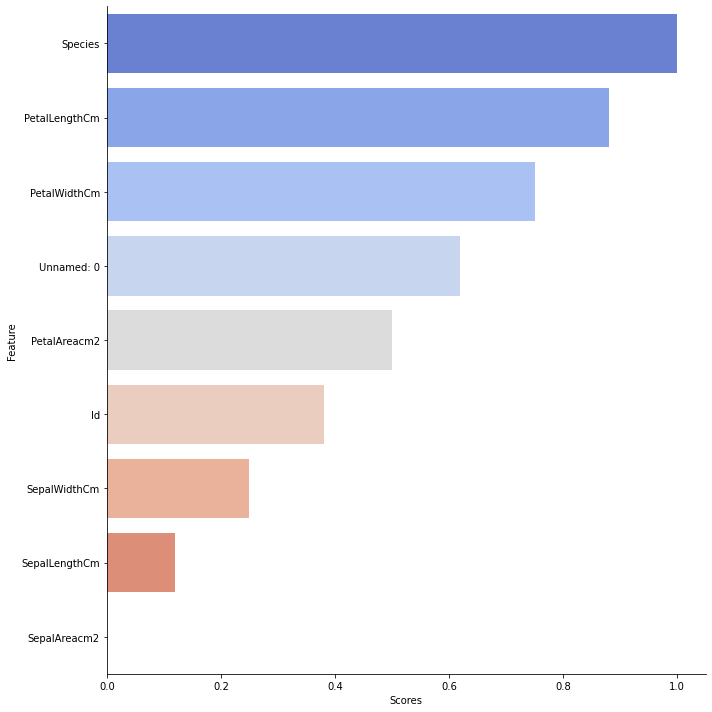

In [36]:
import seaborn as sns
# Let's plot the ranking of the features
sns.factorplot(x="Scores", y="Feature", data = df_rank, kind="bar", 
               size=10, aspect=1, palette='coolwarm')

3. Extratrees

 feature importance kalau di python masuk di ExtraTreesClassifier. ExtraTreesClassifier  lebih melihat ke information clean nya jadi lebih ke arah random fores. 

[0.10068995 0.06728377 0.01612067 0.00810718 0.12556213 0.11778197
 0.00078084 0.14946693 0.41420656]


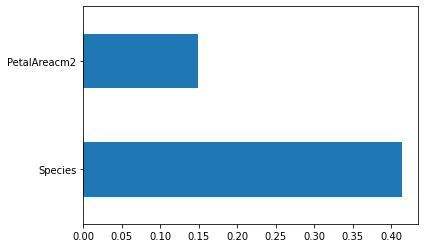

In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(2).plot(kind='barh')
plt.show()

4. Correlation Matrix with Heatmap

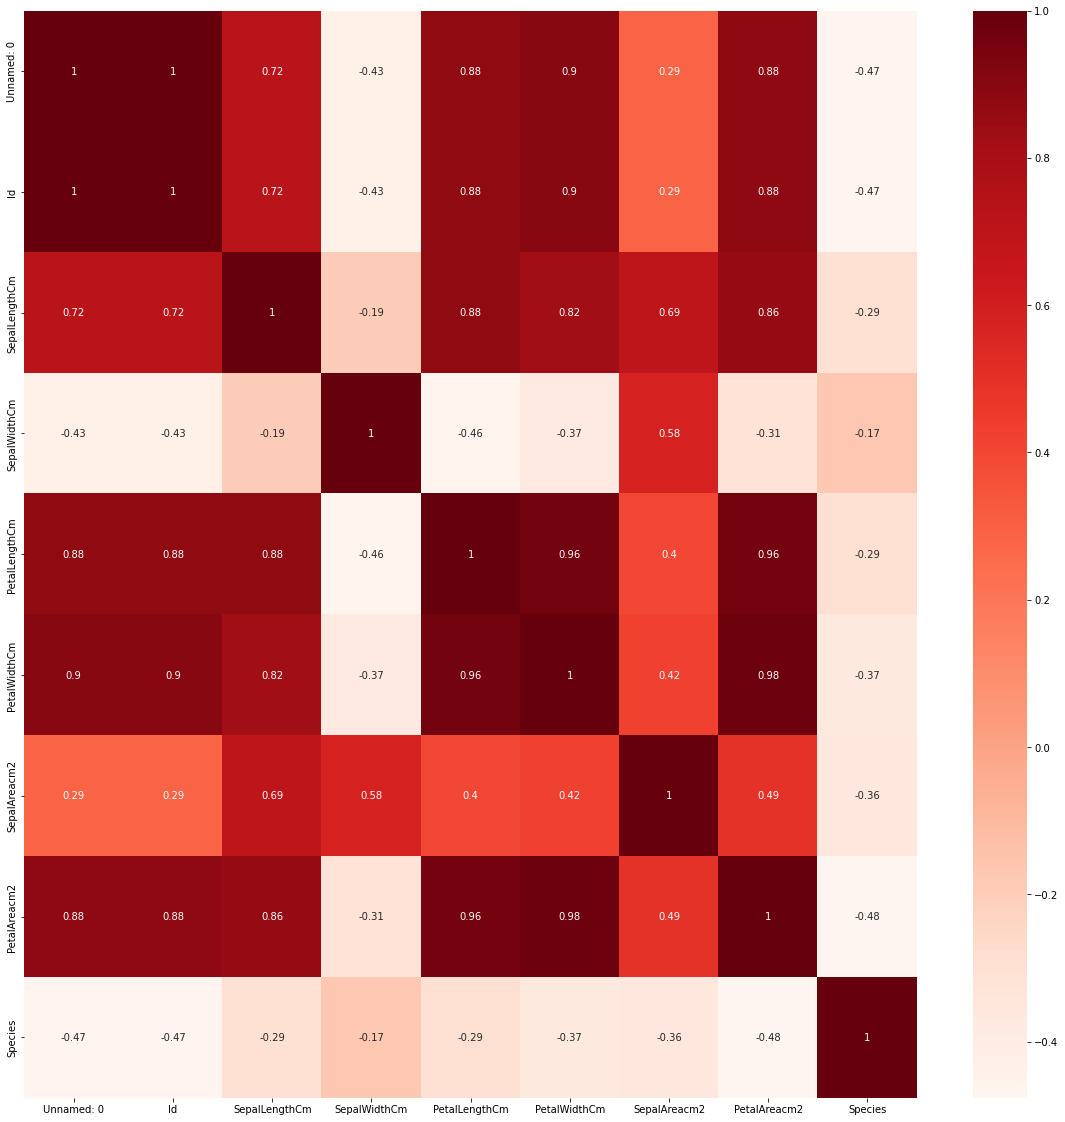

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

X = df_out.iloc[:,0:77]  #independent columns
y = df_out.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset

corrmat = df_out.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_out[top_corr_features].corr(),annot=True,cmap="Reds")

### **Feature Extraction**

Feature extraction, membentuk feature baru berdasarkan feature yang lama dengan dimensi yang lebih sedikit dibandingkan dengan sebelumnya. Teknik yang digunakan adalah featureextraction dengan principal component analysis. Pada Feature extraction itu lebih menghindari informasi-informasi yang hilang artinya lebih mempertahankan agara tidak ada hal-hal yang hilang.

In [39]:
 import numpy as np
 import matplotlib.pyplot as plt
 from matplotlib import offsetbox
 from sklearn import manifold, datasets, decomposition, discriminant_analysis

 digits = datasets.load_digits()

 X = digits.data
 y = digits.target

 n_samples, n_features = X.shape

1. LDA

LDA ini akan mencari kombinasi atribut terbaik yang dapat memisahkan kelas-kelas. 

Cara Kerja LDA yaitu:

memisahkan data dengan memperbesar distance data dan menghitung means dan mencari variansi dari data. Semakin besar distance maka data akan terpisah dengan baik. Dan semakin kecil variansinya, kumpulan data akan semakin mirip. LDA juga supervised.

In [40]:
 def embedding_plot(X, title):
     x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
     X = (X - x_min) / (x_max - x_min)
     plt.figure()
     ax = plt.subplot(aspect='equal')
     sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y/10.)
     shown_images = np.array([[1., 1.]])
     for i in range(X.shape[0]):
         if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
         shown_images = np.r_[shown_images, [X[i]]]
         ax.add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]))
     plt.xticks([]), plt.yticks([])
     plt.title(title)

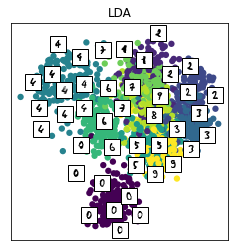

In [41]:
 X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
 embedding_plot(X_lda, "LDA")
 plt.show()

In [42]:
 X_lda

array([[-2.0146322 , -5.62348616],
       [ 0.2209674 ,  3.59240033],
       [ 2.23485453,  2.70950363],
       ...,
       [-1.04697178,  1.48367733],
       [ 0.40787292, -1.99167301],
       [ 0.17414501,  0.88717463]])

In [43]:
#first reduxe de dimensin
from sklearn import manifold, datasets, decomposition, discriminant_analysis

lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)

lda_df = pd.DataFrame(data = lda
             , columns = ['new_var1', 'new_var2'])
finalDf = pd.concat([lda_df, y_fix], axis = 1)
finalDf.head()

,new_var1,new_var2,Species
0,-2.014632,-5.623486,2.0
1,0.220967,3.592400,2.0
2,2.234855,2.709504,2.0
3,2.760965,-0.624427,2.0
4,-5.845449,1.754015,2.0


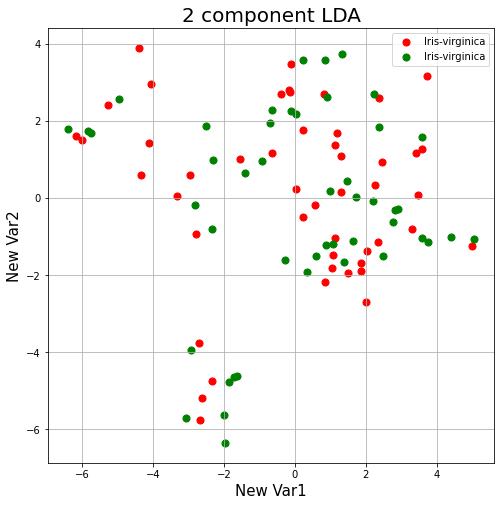

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('New Var1', fontsize = 15)
ax.set_ylabel('New Var2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
targets = [1.0,2.0]
colors = ['red', 'green']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'new_var1']
               , finalDf.loc[indicesToKeep, 'new_var2']
               , c = color
               , s = 50)
ax.legend(["Iris-virginica", "Iris-virginica", "Iris-versicolor"])
ax.grid()

2. PCA

Pada PCA menggunakan teknik unsupervised dan tidak memperhatikan variabel target. PCA bekerja untuk menghitung variance dari tiap atribut. 

In [47]:
#first reduxe de dimensin
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_fix)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_fix], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Species
0,-0.996343,0.216259,2.0
1,-1.001460,-0.023773,2.0
2,-1.025871,0.009298,2.0
3,-1.012508,-0.051369,2.0
4,-0.985630,0.220562,2.0


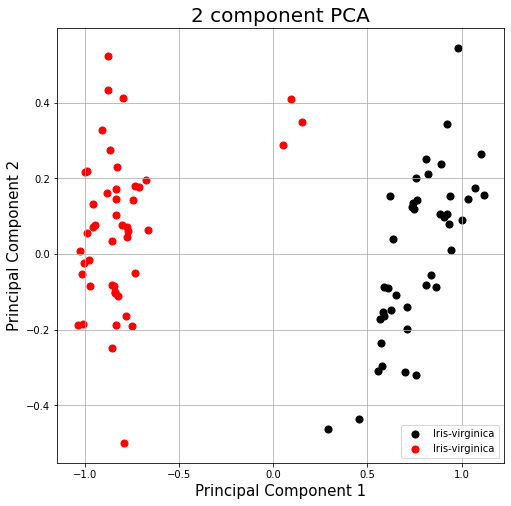

In [49]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1.0,2.0]
colors = ['black', 'red']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["Iris-virginica", "Iris-virginica", "Iris-versicolor"])
ax.grid()

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [51]:
X_2d = tsne.fit_transform(X_fix)

In [52]:
print(X_2d)

[[-12.375082  -15.824744 ]
 [-11.595457  -17.859272 ]
 [-11.734262  -17.459528 ]
 [-11.686982  -17.964375 ]
 [-12.632924  -15.737521 ]
 [-13.529912  -14.505405 ]
 [-11.992695  -16.984598 ]
 [-12.4162245 -16.415564 ]
 [-11.795314  -18.697475 ]
 [-12.16379   -17.772083 ]
 [-13.395442  -15.007026 ]
 [-12.486108  -16.873951 ]
 [-12.213002  -18.242584 ]
 [-12.028487  -18.84752  ]
 [-14.164435  -14.204671 ]
 [-14.02055   -14.683698 ]
 [-13.364376  -16.150202 ]
 [-14.31058   -14.615954 ]
 [-13.863865  -15.299616 ]
 [-13.797056  -16.052818 ]
 [-13.95306   -15.589226 ]
 [-13.0022745 -16.766352 ]
 [-13.736895  -16.982138 ]
 [-13.373315  -17.32526  ]
 [-13.089203  -18.387644 ]
 [-13.868846  -16.945246 ]
 [-14.186592  -16.300201 ]
 [-14.185063  -16.689396 ]
 [-13.456254  -18.238903 ]
 [-13.441849  -18.466738 ]
 [-14.567148  -16.38644  ]
 [-13.8052635 -18.458715 ]
 [-14.214753  -18.003273 ]
 [-14.905246  -16.025219 ]
 [-14.0203495 -18.51537  ]
 [-13.529793  -19.360813 ]
 [-14.738785  -17.271078 ]
 

In [53]:

new_df = pd.DataFrame(data = X_2d
             , columns = ['feature 1', 'feature 2'])
tsne_df = pd.concat([new_df, y_fix], axis = 1)
tsne_df.head()

,feature 1,feature 2,Species
0,-12.375082,-15.824744,2.0
1,-11.595457,-17.859272,2.0
2,-11.734262,-17.459528,2.0
3,-11.686982,-17.964375,2.0
4,-12.632924,-15.737521,2.0


3. t-SNE

t-SNE adalah teknik reduksi nonlinear yang cocok untuk menanamkan data berdimensi tinggi ke dalam data berdimensi lebih rendah (2D atau 3D) untuk visualisasi data. t-SNE sering dipakai untuk visualisasi data yang memiliki dimensi besar dan dipakai luas dalam pemrosesan gambar, pemrosesan bahasa alami , data genomika, dan speech processing.

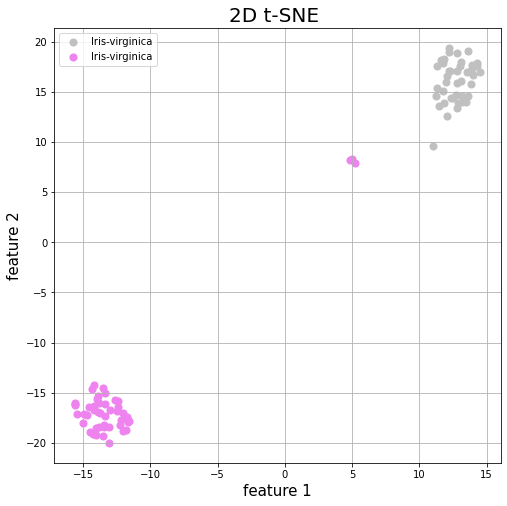

In [55]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('feature 1', fontsize = 15)
ax.set_ylabel('feature 2', fontsize = 15)
ax.set_title('2D t-SNE ', fontsize = 20)
targets = [1.0,2.0]
colors = ['silver', 'violet']
for target, color in zip(targets,colors):
    indicesToKeep = tsne_df['Species'] == target
    ax.scatter(tsne_df.loc[indicesToKeep, 'feature 1']
               , tsne_df.loc[indicesToKeep, 'feature 2']
               , c = color
               , s = 50)
ax.legend(["Iris-virginica", "Iris-virginica", "Iris-versicolor"])
ax.grid()